# Analysis notebook: `SU2020a_CRY_onspill-LH_aw`  

## Define analysis name

In [1]:
ana_label = "SU2020a_CRY_onspill-LH_aw"

## Preamble

In [2]:
import sys
sys.path.append("..")
from preamble import *

## Load data

In [3]:
!ls ../../../output/results/SU2020a_CRY_onspill-LH_aw

analysis.csv	events.parquet	results.pkl
cut_flow.csv	hists.h5	SU2020a_CRY_onspill-LH_aw.log
efficiency.csv	info.txt	SU2020a_CRY_onspill-LH_aw.yaml


In [4]:
loader = Load(
    in_path = f"../../../output/results/{ana_label}"
)

[Load] ✅ Initialised with out_path=../../../output/results/SU2020a_CRY_onspill-LH_aw


In [5]:
results = loader.load_pkl() 
results_from_persistent = loader.load_all() # Persistent backup 

[Load] ✅ Successfully loaded results from ../../../output/results/SU2020a_CRY_onspill-LH_aw/results.pkl
[Load] ✅ Loaded cut stats from ../../../output/results/SU2020a_CRY_onspill-LH_aw/cut_flow.csv
[Load] ✅ Loaded histograms from ../../../output/results/SU2020a_CRY_onspill-LH_aw/hists.h5
[Load] ✅ Loaded analysis info from ../../../output/results/SU2020a_CRY_onspill-LH_aw/analysis.csv
[Load] ✅ Successfully loaded ak.Array from ../../../output/results/SU2020a_CRY_onspill-LH_aw/events.parquet
[Load] ✅ Loaded info from ../../../output/results/SU2020a_CRY_onspill-LH_aw/info.txt


## Analyse results

### Cut flow

In [6]:
display(results["cut_flow"].round(3))

,Cut,Group,Events Passing,Absolute [%],Relative [%],Description
0,No cuts,NaN,2529740,100.000,100.000,No selection applied
1,has_trk_front,Preselect,2480261,98.044,98.044,Tracks intersect tracker entrance
2,is_reco_electron,Preselect,2399747,94.861,96.754,Electron track fits
3,is_downstream,Preselect,1467399,58.006,61.148,Downstream tracks (p_z > 0 at tracker entrance)
4,one_reco_electron,Preselect,1090863,43.122,74.340,One reco electron / event
5,is_truth_electron,Preselect,314287,12.424,28.811,Track parents are electrons (truth PID)
6,good_trkqual,Tracker,121284,4.794,38.590,Track fit quality > 0.8
7,within_t0,Tracker,97556,3.856,80.436,t0 at tracker entrance (640 < t_0 < 1650 ns)
8,has_hits,Tracker,97032,3.836,99.463,>20 active tracker hits
9,within_t0err,Tracker,80288,3.174,82.744,Track fit t0 uncertainty (t0err < 0.9 ns)


### Efficiency & rates

In [7]:
display(results["analysis"].round(3))

,Type,k,N,Eff [%],Eff Err$-$ [%],Eff Err$+$ [%],Rate 1batch [$\text{day}^{-1}$],Rate 1batch Err$-$ [$\text{day}^{-1}$],Rate 1batch Err$+$ [$\text{day}^{-1}$],Rate 2batch [$\text{day}^{-1}$],Rate 2batch Err$-$ [$\text{day}^{-1}$],Rate 2batch Err$+$ [$\text{day}^{-1}$]
0,CE-like (wide),3170,41100000000,0.000,-0.000,0.000,8.258,-0.146,0.148,6.309,-0.111,0.113
1,CE-like (ext),510,41100000000,0.000,-0.000,0.000,1.329,-0.058,0.061,1.015,-0.045,0.047
2,CE-like (sig),59,41100000000,0.000,-0.000,0.000,0.154,-0.020,0.023,0.117,-0.015,0.017
3,No veto (wide),2,3170,99.937,-0.063,0.032,0.005,-0.003,0.007,0.004,-0.003,0.005
4,No veto (ext),0,510,100.000,-0.196,0.000,0.000,0.000,0.003,0.000,0.000,0.002
5,No veto (sig),0,59,100.000,-1.667,0.000,0.000,0.000,0.003,0.000,0.000,0.002


### Histograms

In [8]:
# Setup draw for this cutset
on_spill = "offspill" not in ana_label
draw = Draw(cutset_name=ana_label.split('_')[0], on_spill=on_spill)
# Define image directory
img_dir = f"../../../output/images/{ana_label}"
os.makedirs(img_dir, exist_ok=True)

[Plot] ⭐️ Initialised


[Plot] ✅ 	Wrote ../../../output/images/SU2020a_CRY_onspill-LH_aw/h1o_1x3_mom_windows.png


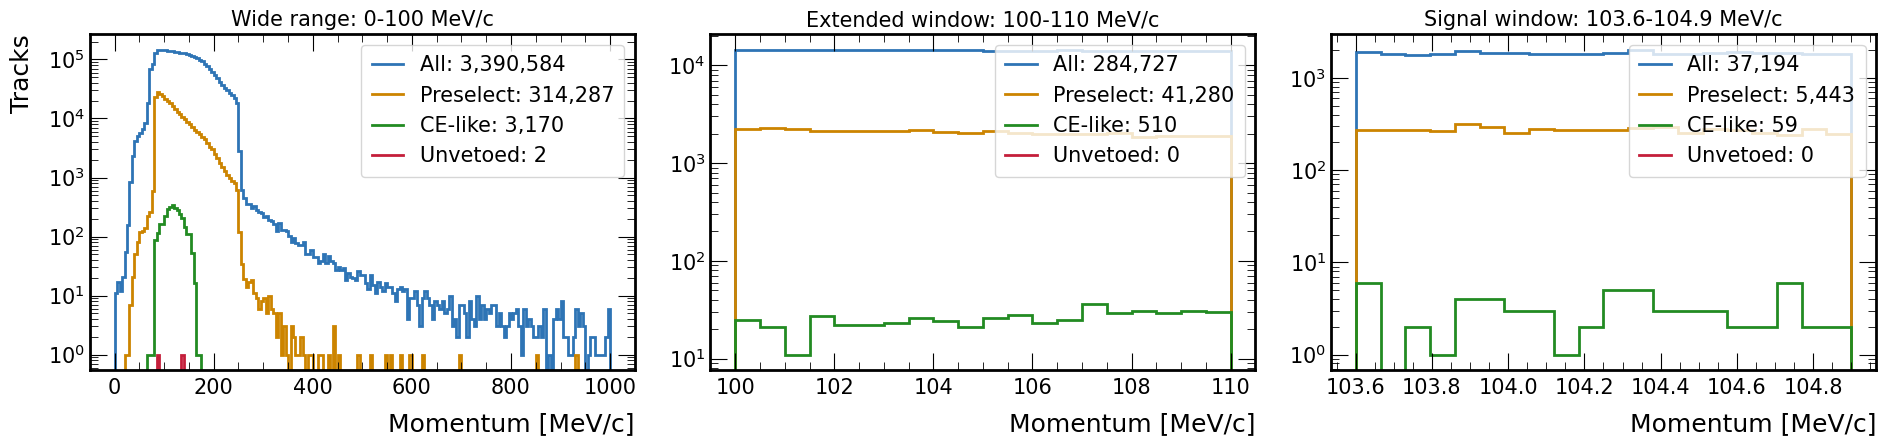

In [9]:
draw.plot_mom_windows(results["hists"], out_path=f"{img_dir}/h1o_1x3_mom_windows.png") 

[Plot] ✅ 	Wrote ../../../output/images/SU2020a_CRY_onspill-LH_aw/h1o_3x3_summary.png


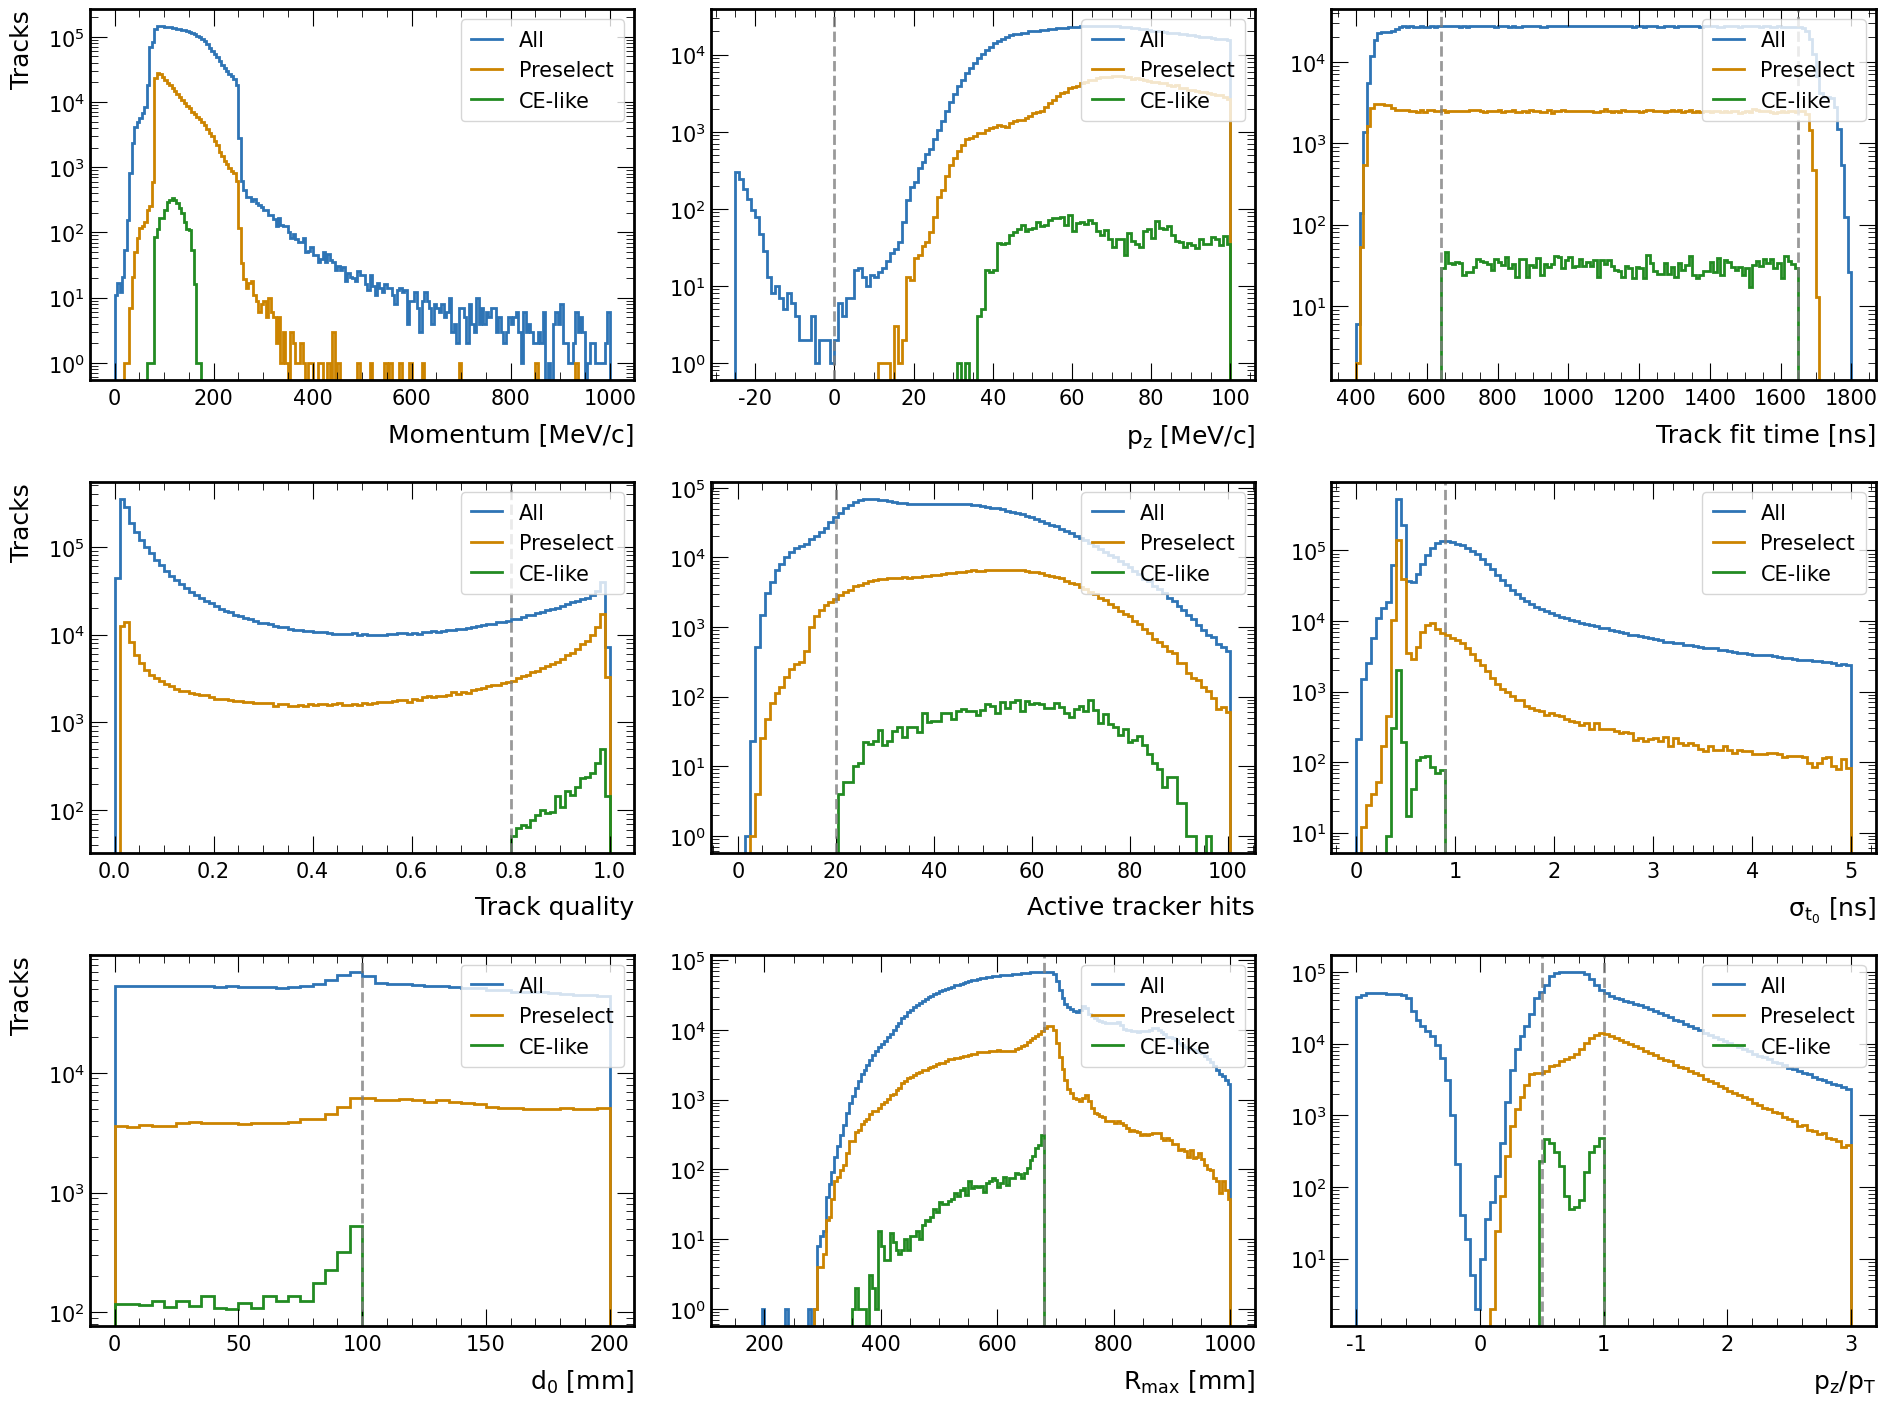

In [10]:
draw.plot_summary(results["hists"], out_path=f"{img_dir}/h1o_3x3_summary.png")

[Plot] ✅ 	Wrote ../../../output/images/SU2020a_CRY_onspill-LH_aw/h1o_crv_z.png


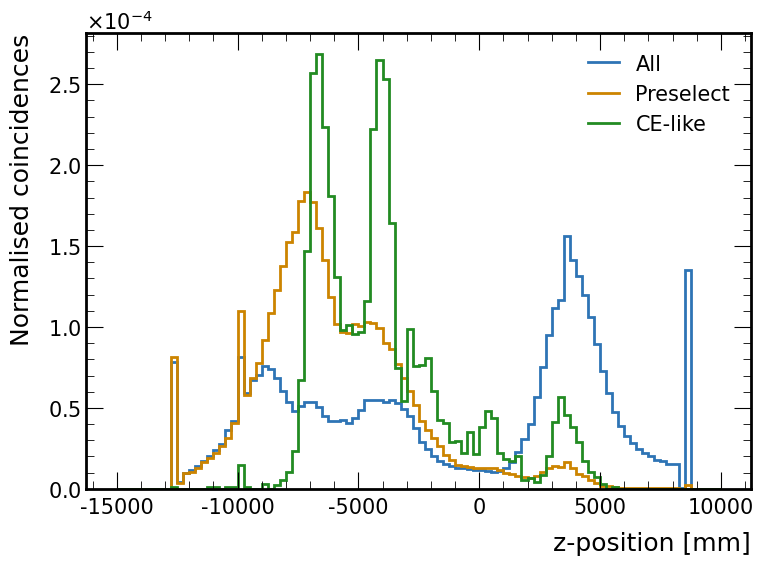

In [11]:
draw.plot_crv_z(results["hists"], out_path=f"{img_dir}/h1o_crv_z.png") 

### Background event info

In [12]:
print(results["event_info"])

  Index:            27
  Subrun:           [3113]
  Event:            [86303]
  File:             nts.mu2e.CosmicCRYSignalAllOnSpillTriggered.MDC2020aw_best_v1_3_v06_05_00.001202_00000034.root
  Track time [ns]:  1004.101804
  Coinc time [ns]:  853.986267
  dt [ns]:          150.115536
----------------------------------------
  Index:            192
  Subrun:           [19742]
  Event:            [359830]
  File:             nts.mu2e.CosmicCRYSignalAllOnSpillTriggered.MDC2020aw_best_v1_3_v06_05_00.001202_00015581.root
  Track time [ns]:  822.773672
  Coinc time [ns]:  None
  dt [ns]:          N/A
----------------------------------------


In [13]:
if results["events"] is not None:
    from pyutils.pyprint import Print
    printer = Print()
    printer.print_n_events(results["events"], n_events = len(results["events"]))

[pyprint] ⭐️ Initialised Print with verbose = False and precision = 1
[pyprint] ⭐️ Printing 2 event(s)...

-------------------------------------------------------------------------------------
evt.run: 1202
evt.subrun: 3113
evt.event: 86303
crv.crvcoincs.time: [854]
crv.crvcoincs.nHits: [18]
crv.crvcoincs.pos.fCoordinates.fZ: [2.56e+03]
at_trk_front: [[False, False, False, True, False, False], [False, False, ..., False]]
has_trk_front: [True, True]
is_reco_electron: [True, False]
is_downstream: [True, True]
one_reco_electron: [True, True]
one_reco_electron_per_event: True
is_truth_electron: [True, True]
good_trkqual: [True, False]
within_t0: [True, True]
has_hits: [True, True]
within_t0err: [True, True]
within_d0: [True, True]
pitch_angle: [[0.342, 0.34, 0.485, 0.524, 0.544, 0.566], [0.35, 0.348, ..., 0.586]]
within_pitch_angle_lo: [True, True]
within_pitch_angle_hi: [True, True]
within_lhr_max_lo: [True, True]
within_lhr_max_hi: [True, True]
unvetoed: [True, False]
within_ext_win: [Fa